In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings 
warnings.filterwarnings('ignore')
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

### Let apply polynomial transformation
from sklearn.preprocessing import PolynomialFeatures

In [174]:
x = 6 * np.random.rand(100, 1) - 3
y = 0.5 * x**2 +1.5 *x +3 + np.random.rand(100, 1)

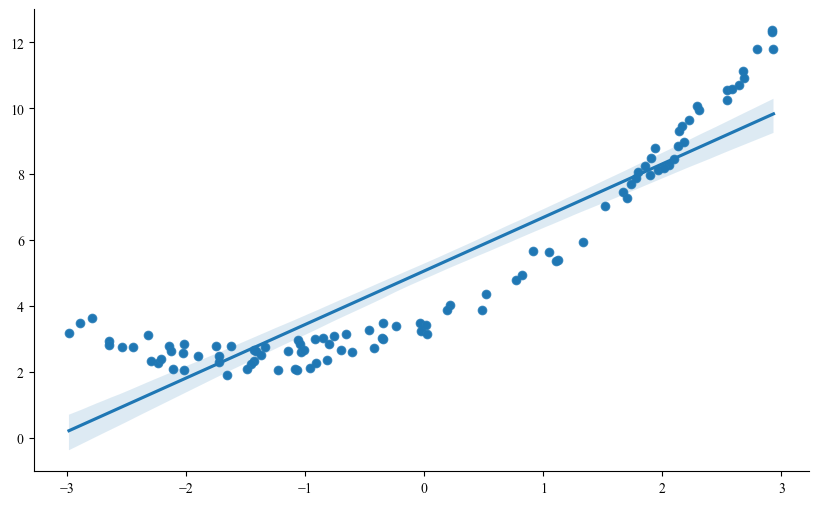

In [176]:
fig, ax = plt.subplots(figsize = (10, 6))
sns.scatterplot(x = x[0:,0 ], y = y[0:, 0])
sns.regplot(x = x[0:,0 ], y = y[0:, 0])
sns.despine()

In [148]:
x = pd.DataFrame(x)

In [156]:
preprocessing = ColumnTransformer([
    ('Polynomial_transfor', PolynomialFeatures(degree=2, include_bias=True),[0])
])

In [160]:
# preprocessing.fit_transform(x)

In [188]:
traning_pipeline = Pipeline([
    ('preprocessing', preprocessing),
 
   ( 'model', LinearRegression())
])

In [214]:
x_train, x_test, y_train, y_test = train_test_split(x, y)

In [216]:
traning_pipeline.fit(x_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('Polynomial_transfor',
                                                  PolynomialFeatures(),
                                                  [0])])),
                ('model', LinearRegression())])

In [218]:
x_train.shape

(75, 1)

In [200]:
traning_pipeline.predict(x_train)[0:,0].shape

(75,)

In [202]:
traning_pipeline.predict(x_train)[0:,0]

array([ 9.58400718,  8.34650746,  3.80949216,  3.46345797,  2.53539321,
       10.66405279,  2.9192396 ,  2.82825411,  2.45016843,  9.07249117,
        5.27540416,  7.78154143,  2.52390038,  8.12634159,  8.82941425,
        3.0469161 ,  7.99224891,  2.65348636,  2.395856  ,  7.37424297,
        5.76586817,  4.34548601,  3.4724352 ,  2.49566913,  4.41858939,
        9.53051009, 12.0813079 ,  2.39769773,  2.56296643,  2.97203219,
        3.34145124,  3.54709531,  3.0551138 ,  2.60099911,  3.20993645,
        2.50649123, 12.15116545,  3.52914832,  2.5787739 ,  2.66300898,
        3.03360744,  2.39388801,  2.39104004, 11.03953025,  2.7175436 ,
        2.41152651,  3.85263783,  2.48479462,  2.71047029,  8.93482398,
        2.74292636,  6.38683333,  2.6963959 ,  3.45748879,  5.80298393,
       11.53818306,  2.42456349,  2.49158603,  2.51879163, 10.90616033,
        5.61684699,  2.38982348,  2.46473926,  8.68550667,  2.51721286,
        2.3892837 ,  2.4751756 , 10.50473782,  7.60353689,  4.95

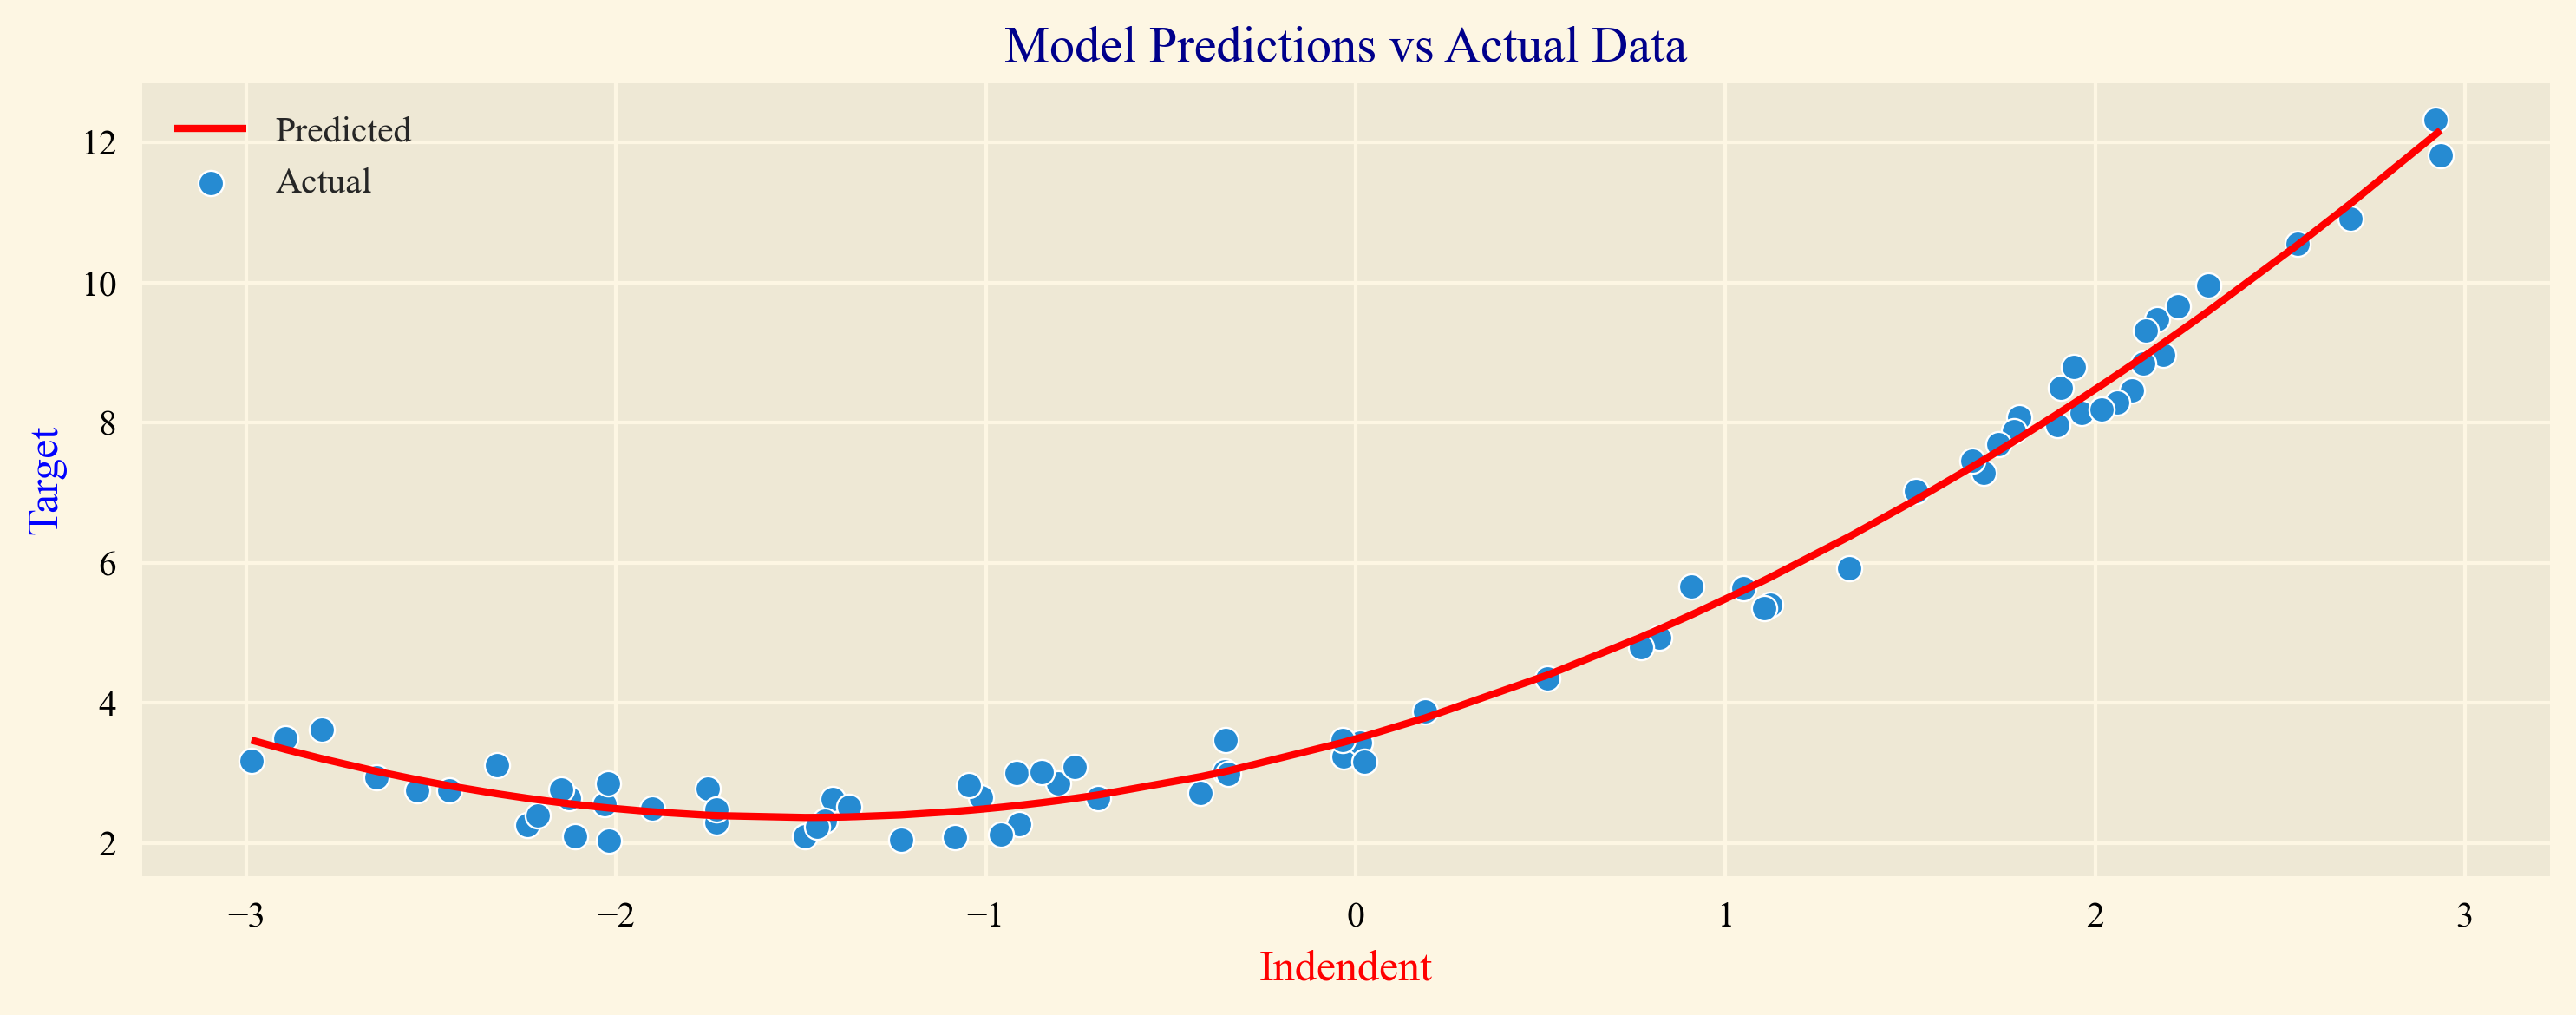

In [246]:
fig, ax = plt.subplots(figsize=(10, 4), dpi=300)
plt.style.use('Solarize_Light2')

plt.rc('font', family='Times New Roman')
sns.lineplot(x=x_train[0:, 0], y=traning_pipeline.predict(x_train)[0:,0], color='r', ax=ax, label='Predicted')
sns.scatterplot(x=x_train[0:,0],  y=y_train[0:, 0],  ax=ax, label='Actual')
ax.set_title('Model Predictions vs Actual Data', fontsize=14)
ax.set_xlabel('Indendent', fontsize=12)
ax.set_ylabel('Target', fontsize=12)
ax.legend()
plt.tight_layout()
sns.despine()
ax.xaxis.label.set_color('r')  # X-axis label color
ax.yaxis.label.set_color('b')  # Y-axis label color
ax.title.set_color('darkblue')  # Title color
ax.tick_params(colors='black')  # Tick color
plt.show()

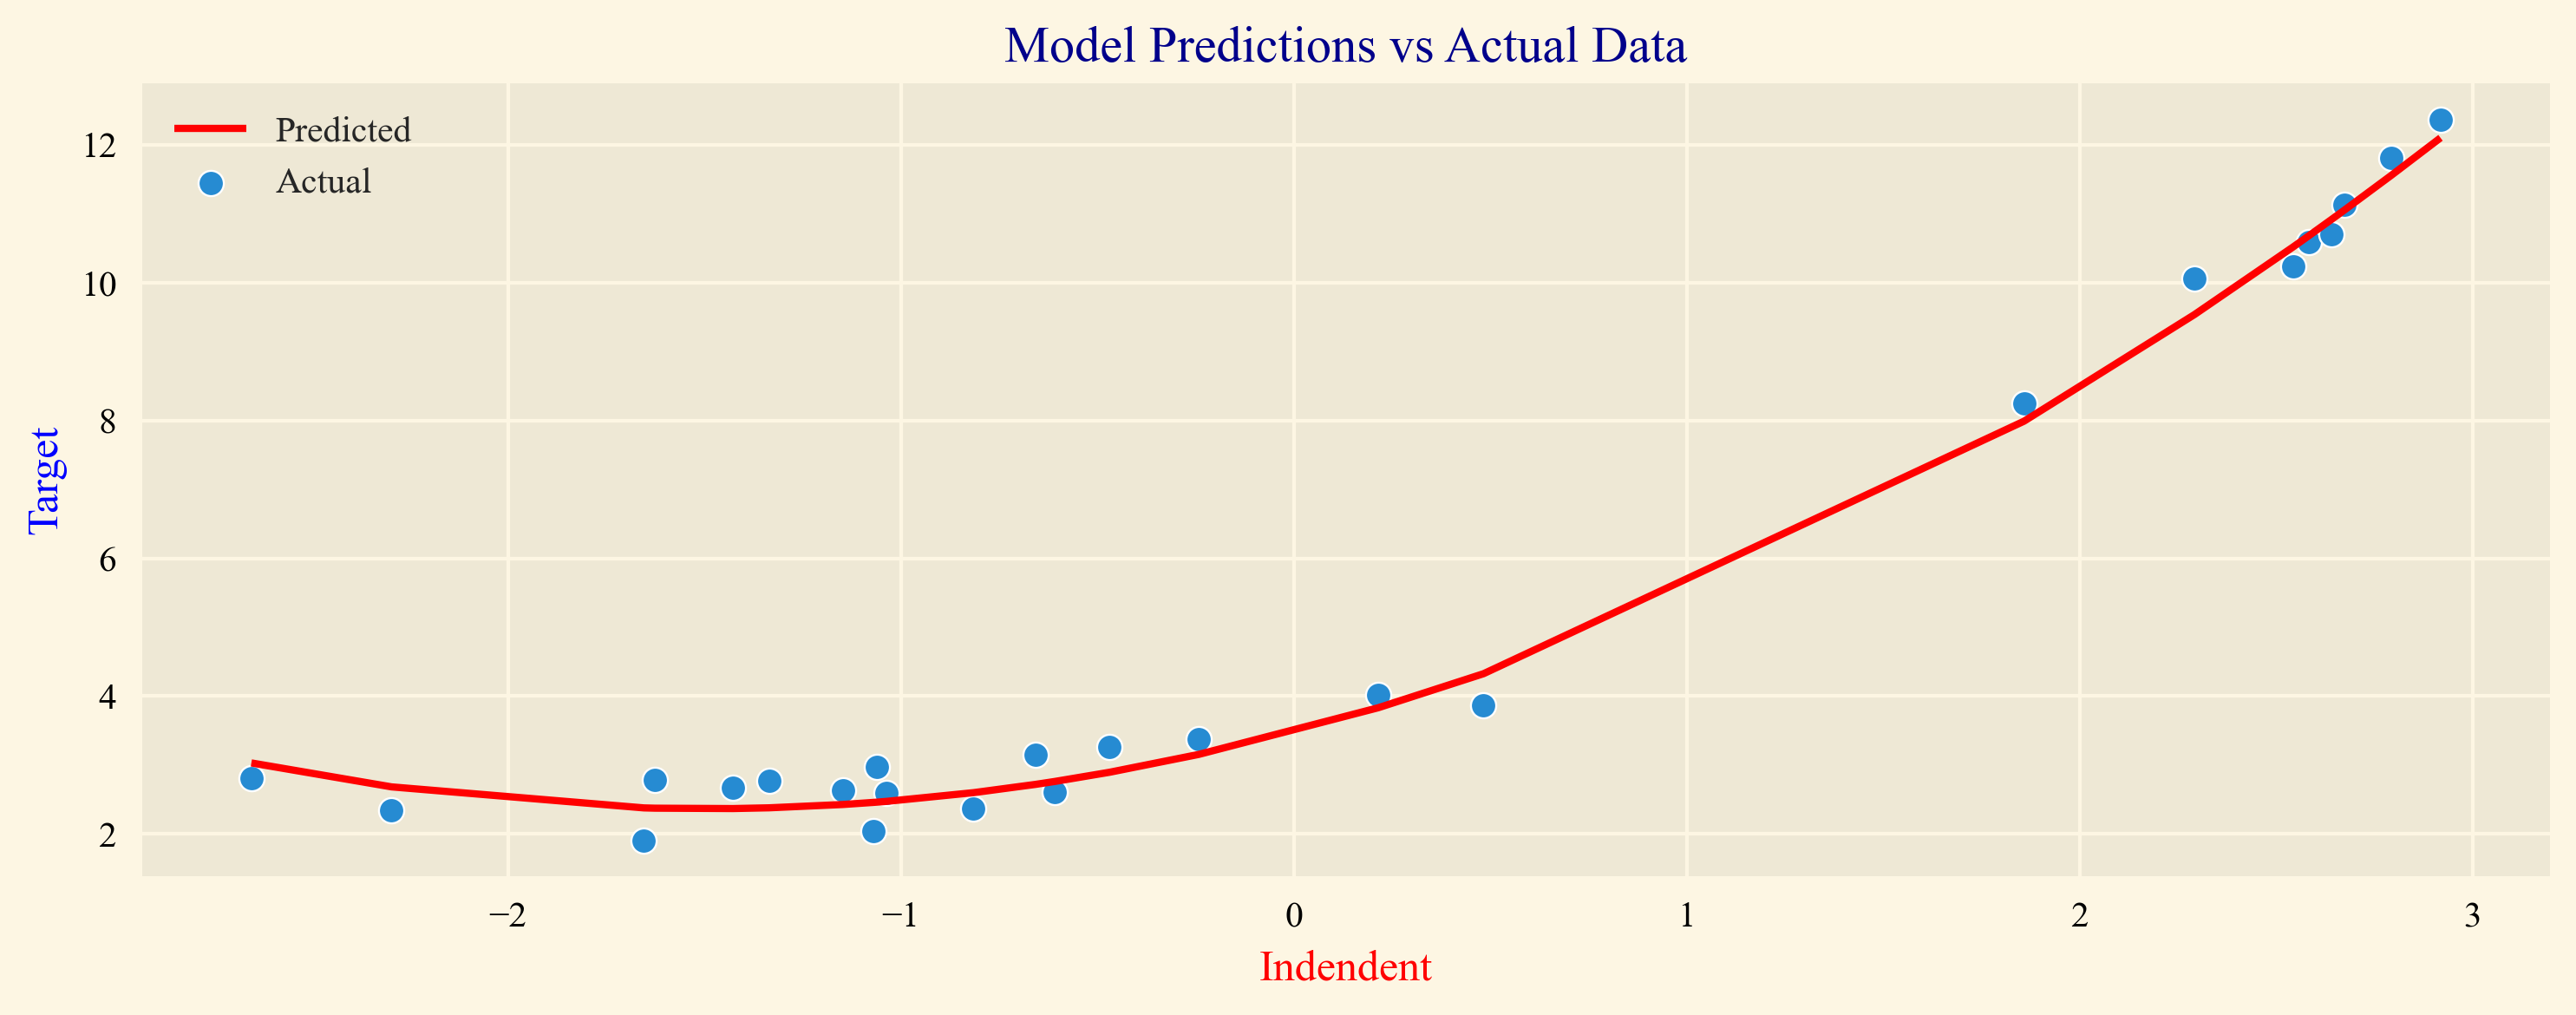

In [250]:
fig, ax = plt.subplots(figsize=(10, 4), dpi=300)
plt.style.use('Solarize_Light2', )

plt.rc('font', family='Times New Roman')
sns.lineplot(x=x_test[0:, 0], y=traning_pipeline.predict(x_test)[0:,0], color='r', ax=ax, label='Predicted')
sns.scatterplot(x=x_test[0:,0],  y=y_test[0:, 0],  ax=ax, label='Actual')
ax.set_title('Model Predictions vs Actual Data', fontsize=14)
ax.set_xlabel('Indendent', fontsize=12)
ax.set_ylabel('Target', fontsize=12)
ax.legend()
plt.tight_layout()
sns.despine()
ax.xaxis.label.set_color('r')  # X-axis label color
ax.yaxis.label.set_color('b')  # Y-axis label color
ax.title.set_color('darkblue')  # Title color
ax.tick_params(colors='black')  # Tick color
plt.show()